# Ensembles

### Load Requirements

In [1]:
%load_ext autoreload
%autoreload

import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from data_utils import get_training, get_testing, HEADER

from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from validation import Validation

from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from my_pca import my_pca

%matplotlib notebook

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Bagging ( Logisitic Regression)

In [5]:
X, y = get_training()
val = Validation(X, y, k = 10)

# pca, best model
base_models = [ (30, LogisticRegression(penalty='l1', C=10)),
                (15, KNeighborsClassifier(n_neighbors=3)),
                (15, LinearDiscriminantAnalysis()),
                (15, QuadraticDiscriminantAnalysis())]

base_model_desc = [ 'Logisitic', 'KNN', 'LDA', 'QDA']

bagging_results = {
    'accuracy' : [],
    'recall' : [],
    'precision' : []
}

bsf = (0,-1,3)

for i, (comp, model) in enumerate(base_models):
    val.update(pca=comp)
    mdl = BaggingClassifier(model)
    acc = val.cross_val_accuracy(mdl)
    r = val.get_detailed_results()
    bagging_results['accuracy'].append(np.array(r['accuracy']).mean())
    bagging_results['recall'].append(np.array(r['recall']).mean())
    bagging_results['precision'].append(np.array(r['precision']).mean())
    
    if bsf[0] < acc:
        bsf = (acc, i)

In [10]:
print base_model_desc[bsf[1]]
print bsf[0]

Logisitic
0.982778947368


## Plot Bagging Scores

<IPython.core.display.Javascript object>


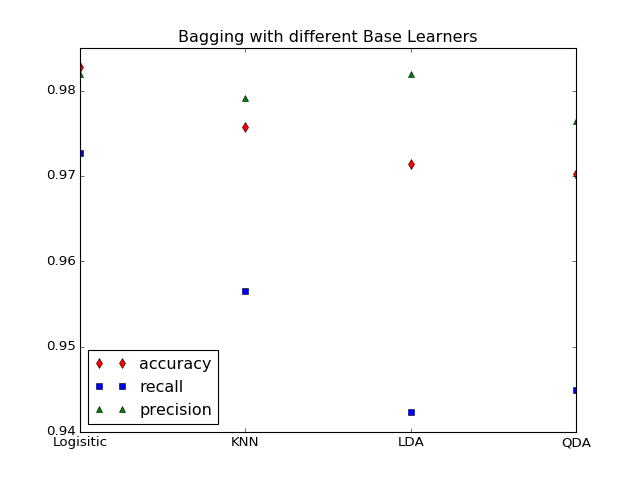

In [20]:
plt.close()
x = range(1,5)
lines = plt.plot(x, bagging_results['accuracy'][0:4], 'rd', x, bagging_results['recall'][0:4], 'bs', x, bagging_results['precision'][0:4], 'g^')
plt.legend(lines, ('accuracy','recall','precision'),loc='lower left')
plt.title('Bagging with different Base Learners')
plt.xticks(x, base_model_desc)
plt.show()

### Boosting 

In [3]:
X, y = get_training()
val = Validation(X, y, k = 10, bootstrap = -1)

# pca, best model
base_models = [ (30, LogisticRegression(penalty='l1', C=10))]

base_model_desc = [ 'Logisitic', 'KNN', 'LDA', 'QDA']

boost_results = {
    'accuracy' : [],
    'recall' : [],
    'precision' : []
}

bsf = (0,-1,3)

for i, (comp, model) in enumerate(base_models):
    val.update(pca=comp)
    mdl = AdaBoostClassifier(model, n_estimators=25)
    acc = val.cross_val_accuracy(mdl)
    r = val.get_detailed_results()
    boost_results['accuracy'].append(np.array(r['accuracy']).mean())
    boost_results['recall'].append(np.array(r['recall']).mean())
    boost_results['precision'].append(np.array(r['precision']).mean())
    
    if bsf[0] < acc:
        bsf = (acc, i)

ValueError: LinearDiscriminantAnalysis doesn't support sample_weight.

<IPython.core.display.Javascript object>


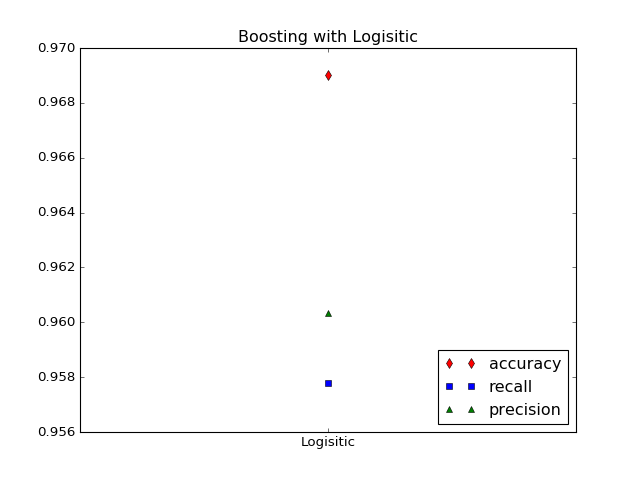

In [4]:
plt.close()
x = range(1,2)
lines = plt.plot(x, boost_results['accuracy'], 'rd', x, boost_results['recall'], 'bs', x, boost_results['precision'], 'g^')
plt.legend(lines, ('accuracy','recall','precision'),loc='lower right')
plt.title('Boosting with Logisitic')
plt.xticks(x, base_model_desc)
plt.show()

## Confusion matrices

In [5]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '%.2f'%cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.gcf().subplots_adjust(bottom=0.2)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [6]:
# best model
X_reduced = my_pca(X,30)
base = LogisticRegression(penalty='l1', C=10)

<IPython.core.display.Javascript object>


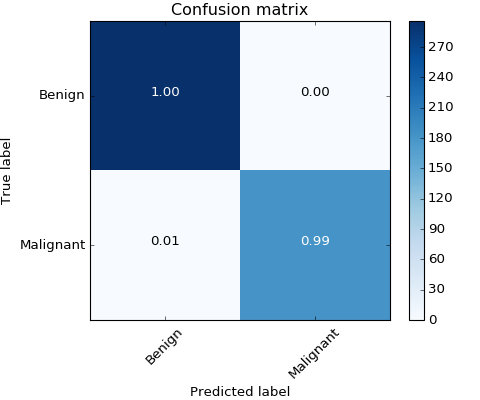

Normalized confusion matrix


In [7]:
plt.figure(figsize=(6,5))
mdl = BaggingClassifier(base)
y_pred = mdl.fit(X_reduced, y).predict(X_reduced)
cm_pca = confusion_matrix(y, y_pred)
plot_confusion_matrix(cm_pca, classes=['Benign', 'Malignant'], normalize=True)

<IPython.core.display.Javascript object>


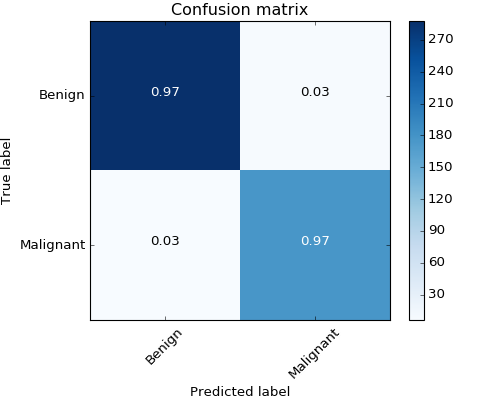

Normalized confusion matrix


In [8]:
plt.figure(figsize=(6,5))
mdl = AdaBoostClassifier(base)
y_pred = mdl.fit(X_reduced, y).predict(X_reduced)
cm_pca = confusion_matrix(y, y_pred)
plot_confusion_matrix(cm_pca, classes=['Benign', 'Malignant'], normalize=True)